In [3]:
def stream_diam(G):
    step = 0

    # At the beginning, R contains for each vertex v the number of nodes that can be reached from v in one step
    R={v:G.degree(v) for v in G.nodes()}
    done = False

    while not done:
        done = True
        for edge in G.edges():
            # At the i-th iteration, we change the value of R if there is at least one node that may be reached from v in i steps but not in i steps
            # I realize that this is the case, because I have a neighbor that in i-1 steps is able to visit a number of vertices different from how many I am able to visit
            if R[edge[0]] != R[edge[1]]:
                R[edge[0]] = max(R[edge[0]],R[edge[1]])
                R[edge[1]] = R[edge[0]]
                done = False
        step += 1

    return step

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

class Analyzer:
    
    def __init__(self, network):
        self.network = network
        
    def get_degree_distribution(self):
        "Returns the plot of the degree distribution with a log-log scale"
        
        # if the network is directed, we consider the in-degree
        degree_sequence = sorted([d for n, d in self.network.in_degree()], reverse=True) if nx.is_directed(self.network) else sorted([d for n, d in self.network.degree()], reverse=True)
            
        degree_freq = {}
        for d in degree_sequence:
            if d in degree_freq:
                degree_freq[d] += 1
            else:
                degree_freq[d] = 1
                
        # Extract degrees and frequencies
        degrees = list(degree_freq.keys())
        frequencies = list(degree_freq.values())

        # Plotting in log-log scale
        plt.figure(figsize=(8, 6))
        plt.loglog(degrees, frequencies, marker='o', linestyle='None', color='b')
        plt.title('Log-log Degree Distribution')
        plt.xlabel('Degree (log scale)')
        plt.ylabel('Frequency (log scale)')
        plt.grid(True)

        return plt
    
    def get_clustering_coefficient(self):
        "Returns the average clustering coefficient of the network"
        return nx.average_clustering(self.network)
    
    def get_diameter(self):
        "Returns the diameter of the network"
        return stream_diam(self.network)

25000
23000065


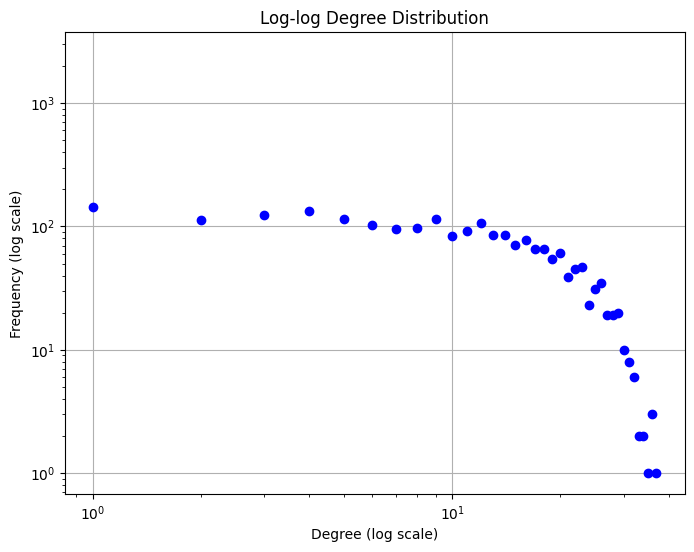

In [7]:
G = nx.Graph()  
    
f = open('net_2', 'r')

for line in f:
    line = line.split()
    G.add_edge(int(line[0]), int(line[1]))
    
f.close()
        
print(G.number_of_nodes())
print(G.number_of_edges())

analyzer = Analyzer(G)
plt = analyzer.get_degree_distribution()
plt.show()

In [8]:
# print number of nodes and edges
print("Number of nodes:", G.number_of_nodes(), "\nNumber of edges:", G.number_of_edges())

# check if the diameter is ln n
print("Diameter:", analyzer.get_diameter())

print("ln n:", math.log(G.number_of_nodes()))

Number of nodes: 25000 
Number of edges: 23000065
Diameter: 3
ln n: 10.126631103850338
